# Data Analysis on Vacation Data

### In this analysis we are going to describe the behaviour of multiple vacation plans.

### import required libraries

In [50]:
# import pandas as pd
import pandas as pd

# import numpy

import numpy as np

# import matplotlib =>

import matplotlib.pyplot as plt

# import seaborn

import seaborn as sns

print(np.__version__)

2.2.2


In [51]:
# misc Functions

def to_fixed(num, digits=0):
    return float(round(num, digits))

# Load the Data

In [52]:
# Load the data file we have in folder

df_vacation_data = pd.read_excel("vacation data.xlsx")

print(type(df_vacation_data))

<class 'pandas.core.frame.DataFrame'>


# Data Overview

In [53]:
print(df_vacation_data.head())

   Gender  Age  Education                  Occupation State  \
0  Female   25        6.0  Clerical or service worker   VIC   
1  Female   31        8.0                professional    WA   
2    Male   21        3.0                         NaN   NSW   
3  Female   18        2.0                  unemployed   NSW   
4    Male   61        3.0                     retired    WA   

  Relationship_Status  Obligation_Rating Obligation_Category       NEP  \
0              single           4.800000                  Q4  3.200000   
1             married           3.300000                  Q1  3.400000   
2              single           3.400000                  Q2  3.066667   
3              single           2.633333                  Q1  3.400000   
4             married           3.400000                  Q2  3.733333   

   Vacation_Behaviour  ... Life_style_of_the_local_people  \
0            2.066667  ...                             no   
1            2.000000  ...                            

In [54]:
# Show the shape of the Data

df_vacation_data.shape

(1000, 32)

In [55]:
# # Make a small program utilised for adding two numbers

# # defining inputs and variables 
# a = int(input("Enter First Number: "))
# b = int(input("Enter Second Number: "))

# # user define function to add two numbers
# def add(x,y):
#     # using self to use variable from parameters
#     print(f"First Number: {x}")
#     print(f"Second Number: {y}")
#     # returning addition of both number directly
#     return x+y

# print(f"Addition: {add(a,b)}")

In [56]:
# # Make a small program utilised for adding two numbers


# # user define function to add two numbers
# def add():
#     # defining inputs and variables 
#     x = int(input("Enter First Number: "))
#     y = int(input("Enter Second Number: "))
#     # using self to use variable from parameters
#     print(f"First Number: {x}")
#     print(f"Second Number: {y}")
#     # returning addition of both number directly
#     return x+y

# print(f"Addition: {add()}")

**Interpretation**
 - we have 1000 observations(Rows)
 - we have 32 attributes (Columns)

In [57]:
# Show the basic info of the data

# number of attributes that a  nnumerical and categorical
# data inconsistencies
# memory usage for data processing

df_vacation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Gender                                1000 non-null   object 
 1   Age                                   1000 non-null   int64  
 2   Education                             992 non-null    float64
 3   Occupation                            941 non-null    object 
 4   State                                 1000 non-null   object 
 5   Relationship_Status                   996 non-null    object 
 6   Obligation_Rating                     1000 non-null   float64
 7   Obligation_Category                   1000 non-null   object 
 8   NEP                                   1000 non-null   float64
 9   Vacation_Behaviour                    975 non-null    float64
 10  Rest_and_relax                        1000 non-null   object 
 11  Luxury_be spoilt  

**Interpretation**

 - we have total 7 numerical columns and 25 categorical columns
 - memory usage is 250.1+ kb that means we do not require extra resources
 - After observing the output we can say that there are missing records in Data 

In [58]:
# justify the basic statistics of the data

df_vacation_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,44.168000,14.539228,18.000000,32.000000,42.000000,57.000000,105.0
Education,992.0,4.813508,2.422252,1.000000,3.000000,6.000000,7.000000,8.0
Obligation_Rating,1000.0,3.734767,0.635777,1.000000,3.366667,3.800000,4.200000,5.0
NEP,1000.0,3.648600,0.561135,1.733333,3.266667,3.666667,4.066667,5.0
Vacation_Behaviour,975.0,2.962800,0.668347,1.233333,2.466667,2.944444,3.428571,4.9
Income_Doller_k,200.0,60.560000,26.264721,15.000000,41.500000,61.500000,78.000000,137.0
Expenditure_Doller_k,200.0,50.200000,25.823522,1.000000,34.750000,50.000000,73.000000,99.0


**Interpretation**

 - Not numerical column has a outlier in this data

## Data Preprocessing



In [59]:
# Null Value Handling

# show count of null records in data

df_vacation_data.isnull().sum()

Gender                                    0
Age                                       0
Education                                 8
Occupation                               59
State                                     0
Relationship_Status                       4
Obligation_Rating                         0
Obligation_Category                       0
NEP                                       0
Vacation_Behaviour                       25
Rest_and_relax                            0
Luxury_be spoilt                          0
Do_sports                                 0
excitement_a_challenge                    0
Not_exceed_planned_budget                 0
Realise_creativity                        0
Fun_and_entertainment                     0
Good_company                              0
Health_and_beauty                         0
Free_and_easy_going                       0
Entertainment_facilities                  0
Not_care_about_prices                     0
Life_style_of_the_local_people  

**Interpretation**

- we have 8 null record in education attribute
- we have 59 null record in occupation attribute
- we have 4 null record in relationship status attribute
- we have 25 null record in vacation behaviour attribute
- we have 800 null record in Income Doller (k) attribute
- we have 800 null record in Expenditure Doller (k) attribute

## Laws to treat null records in manufacturing

1. If null record percent is less than 15% --> remove observations (rows)
2. If null record percentage is between 20% to 70% --> impute the missing records (fill null values)
3. If null record percentage is greater than 75% --> remove the attribute (column)

In [60]:
# find percentage of missing records

df_vacation_data.isnull().sum() / len(df_vacation_data) * 100

Gender                                   0.0
Age                                      0.0
Education                                0.8
Occupation                               5.9
State                                    0.0
Relationship_Status                      0.4
Obligation_Rating                        0.0
Obligation_Category                      0.0
NEP                                      0.0
Vacation_Behaviour                       2.5
Rest_and_relax                           0.0
Luxury_be spoilt                         0.0
Do_sports                                0.0
excitement_a_challenge                   0.0
Not_exceed_planned_budget                0.0
Realise_creativity                       0.0
Fun_and_entertainment                    0.0
Good_company                             0.0
Health_and_beauty                        0.0
Free_and_easy_going                      0.0
Entertainment_facilities                 0.0
Not_care_about_prices                    0.0
Life_style

In [61]:
# As per the law let's remove attributes 

# missing percent greater than 75%

df_vacation_data.drop('Income_Doller_k',axis=1,inplace=True) # punching method (Reversing through breakpoints is not possible)
df_vacation_data = df_vacation_data.drop('Expenditure_Doller_k',axis=1) # reassigning values (Buiness Standard)

In [62]:
# perform authentic check

df_vacation_data.columns

Index(['Gender', 'Age', 'Education', 'Occupation', 'State',
       'Relationship_Status', 'Obligation_Rating', 'Obligation_Category',
       'NEP', 'Vacation_Behaviour', 'Rest_and_relax', 'Luxury_be spoilt',
       'Do_sports', 'excitement_a_challenge', 'Not_exceed_planned_budget',
       'Realise_creativity', 'Fun_and_entertainment', 'Good_company',
       'Health_and_beauty', 'Free_and_easy_going', 'Entertainment_facilities',
       'Not_care_about_prices', 'Life_style_of_the_local_people',
       'Intense_Experience_of_Nature', 'Cosiness_or_Familiar_Atmosphere',
       'Maintain_Unspoilt_Surroundings', 'Everything_Organised',
       'Unspoilt_Nature_or_Natural_Landscape', 'Cultural_Offers',
       'Change_of_Surroundings'],
      dtype='object')

In [63]:
# for more checks
df_vacation_data.shape

(1000, 30)

In [64]:
# Check percentage of missing record
df_vacation_data.isnull().sum() / len(df_vacation_data) * 100


Gender                                  0.0
Age                                     0.0
Education                               0.8
Occupation                              5.9
State                                   0.0
Relationship_Status                     0.4
Obligation_Rating                       0.0
Obligation_Category                     0.0
NEP                                     0.0
Vacation_Behaviour                      2.5
Rest_and_relax                          0.0
Luxury_be spoilt                        0.0
Do_sports                               0.0
excitement_a_challenge                  0.0
Not_exceed_planned_budget               0.0
Realise_creativity                      0.0
Fun_and_entertainment                   0.0
Good_company                            0.0
Health_and_beauty                       0.0
Free_and_easy_going                     0.0
Entertainment_facilities                0.0
Not_care_about_prices                   0.0
Life_style_of_the_local_people  

In [65]:
# Drop the null records from Dataframe

df_vacation_data.dropna(inplace=True)

In [66]:
# Authentic check

df_vacation_data.isnull().sum()

Gender                                  0
Age                                     0
Education                               0
Occupation                              0
State                                   0
Relationship_Status                     0
Obligation_Rating                       0
Obligation_Category                     0
NEP                                     0
Vacation_Behaviour                      0
Rest_and_relax                          0
Luxury_be spoilt                        0
Do_sports                               0
excitement_a_challenge                  0
Not_exceed_planned_budget               0
Realise_creativity                      0
Fun_and_entertainment                   0
Good_company                            0
Health_and_beauty                       0
Free_and_easy_going                     0
Entertainment_facilities                0
Not_care_about_prices                   0
Life_style_of_the_local_people          0
Intense_Experience_of_Nature      

# EDA (Exploratary Data Analytics)

EDA: It is a method utilized to convert data info the information.

- Unstructed: Raw data
- Semi Structed: JSON
- Structed: CSV

1) Univariate Analysis: When we took single column for analysis, it's called univariate analysis. 
- We have two kind of datatypes while analysis numerical and categorical 
- when we have only 1 numerical column plot **histogram** or **KDE** plot
- when we have only one categorical column plot **the count** plot

2) Bivariate Analysis: When we took two columns for analysis, it's called bivariate analysis.
- When we have 2 numerical columns plot **the scatter plot** 
- When we have 1 numerical and other categorical then plot **the Bar** plot

3) Multivariate Analysis: When we took more than wo columns for analysis, it's called multivariate analysis.
- In this case we are going to create **pair plot** with **hue parameter** *(Not Recommended)*
- In multivariate analysis we create **cross tab** or **pivot table**

## Univariate Analysis



In [67]:
# Seggregate the data based on data types

df_num = df_vacation_data.select_dtypes(include='number') # Numerical DataFrame
df_cat = df_vacation_data.select_dtypes(include='object') # Categorical DataFrame

In [68]:
# Show first 5 observations of Numerical Data

df_num.head()

,Age,Education,Obligation_Rating,NEP,Vacation_Behaviour
0,25,6.0,4.800000,3.200000,2.066667
1,31,8.0,3.300000,3.400000,2.000000
3,18,2.0,2.633333,3.400000,2.166667
4,61,3.0,3.400000,3.733333,1.724138
5,63,7.0,4.400000,4.266667,3.300000


In [69]:
# Show first 5 observations of Categorical Data

df_cat.head()

,Gender,Occupation,State,Relationship_Status,Obligation_Category,Rest_and_relax,Luxury_be spoilt,Do_sports,excitement_a_challenge,Not_exceed_planned_budget,...,Entertainment_facilities,Not_care_about_prices,Life_style_of_the_local_people,Intense_Experience_of_Nature,Cosiness_or_Familiar_Atmosphere,Maintain_Unspoilt_Surroundings,Everything_Organised,Unspoilt_Nature_or_Natural_Landscape,Cultural_Offers,Change_of_Surroundings
0,Female,Clerical or service worker,VIC,single,Q4,yes,no,no,no,no,...,no,no,no,no,no,no,no,no,no,no
1,Female,professional,WA,married,Q1,yes,yes,no,no,no,...,no,no,yes,no,no,no,no,no,no,yes
3,Female,unemployed,NSW,single,Q1,yes,yes,no,no,yes,...,yes,no,no,yes,no,no,no,no,no,yes
4,Male,retired,WA,married,Q2,yes,no,no,no,yes,...,no,no,yes,no,no,yes,no,no,no,no
5,Female,retired,QLD,married,Q4,yes,no,no,no,yes,...,no,no,no,no,yes,no,no,no,no,no


### Perform the Univariate Analysis on Numerical Data

In [70]:
# Show numerical Columns

df_num.columns

Index(['Age', 'Education', 'Obligation_Rating', 'NEP', 'Vacation_Behaviour'], dtype='object')

#### Age


In [71]:
# Show the min Age
df_num.Age.min()

18

In [72]:
# Show Max Age

df_num.Age.max()

105

In [73]:
# show the avg

to_fixed(df_num.Age.mean(),2)

44.22

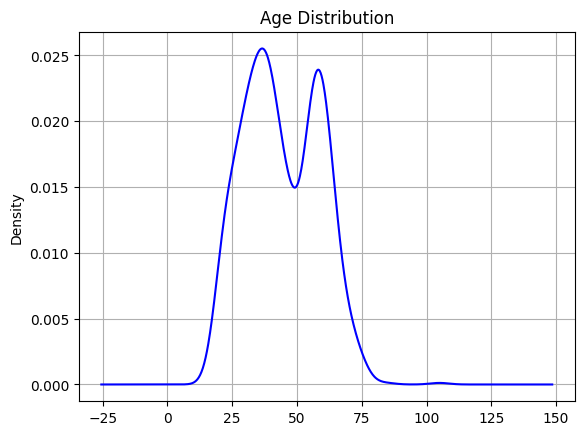

In [74]:
# Show the Distribuation of Single Numerical Column

df_num.Age.plot(kind='kde',color='blue',title='Age Distribution', grid=True) # kernel density plot
plt.show()

## Interpretation

- Minimum Age of the person who is going for vacation is 18
- Maximum age of the person who is going for vacation is 105
- Average Age of the person whi is going for vacation is 44.22
- The Data follows multi-model distribution
- we have two groups in Data, rages are b/w 25-49 and 50-60


In [75]:
# Show the column presenting numerical DataFrame

df_num.columns

Index(['Age', 'Education', 'Obligation_Rating', 'NEP', 'Vacation_Behaviour'], dtype='object')

#### Education

In [87]:
# Show Min, Max and Average of Education Attribute

print(f"Min: {to_fixed(df_num.Education.min(),2)} \nMax: {to_fixed(df_num.Education.max(),2)} \nAverage: {to_fixed(df_num.Education.mean(),2)}") 

Min: 1.0 
Max: 8.0 
Average: 4.88


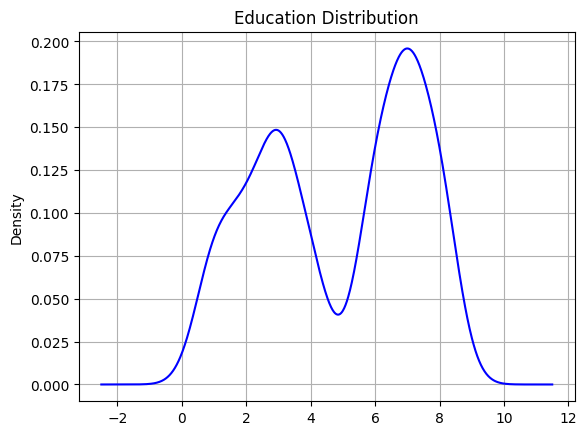

In [77]:
# Show the Distribuation of Single Numerical Column

df_num.Education.plot(kind='kde',color='blue',title='Education Distribution', grid=True) # kernel density plot
plt.show()

**Interpretation**

- Minimum Education of Person going for Vacation is 1
- Maximum Education of Person going for Vacation is 8
- Average Education of Person going for Vacation is 4.88
- The Data follows multi-model distribution
- we have two groups in Data, rages are b/w 1-4 and 6-8


In [78]:
# Show the numerical Columns

df_num.columns

Index(['Age', 'Education', 'Obligation_Rating', 'NEP', 'Vacation_Behaviour'], dtype='object')

#### Obligation Rating

In [79]:
# Show min, max and average of obigation rating attribute

print(f"Min: {df_num.Obligation_Rating.min()} \nMax: {df_num.Obligation_Rating.max()} \nAverage: {float(round(df_num.Obligation_Rating.mean(),2))}")


Min: 1.0 
Max: 5.0 
Average: 3.74


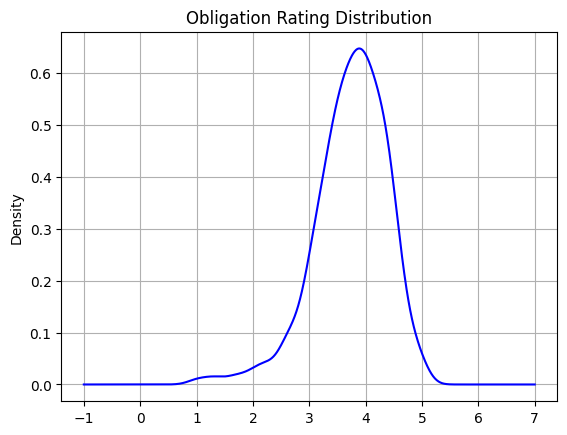

In [80]:
df_num.Obligation_Rating.plot(kind='kde',color='blue',title='Obligation Rating Distribution', grid=True) # kernel density plot
plt.show()

**Interpretation**

- Min Obligation Rating of people going to vacation is 1
- Max Obligation Rating of people going to vacation is 5
- Average Obligation Rating of people going to vacation is 3.74
- Since we have normal distribution range is 3-5


In [81]:
# Show the numerical Columns

df_num.columns

Index(['Age', 'Education', 'Obligation_Rating', 'NEP', 'Vacation_Behaviour'], dtype='object')

#### NEP (New Ecological Paradigm)

In [82]:
# Show min, max and average of NEP attribute

print(f"Min: {float(round(df_num.NEP.min(),2))} \nMax: {df_num.NEP.max()} \nAverage: {float(round(df_num.NEP.mean(),2))}")

Min: 1.73 
Max: 5.0 
Average: 3.65


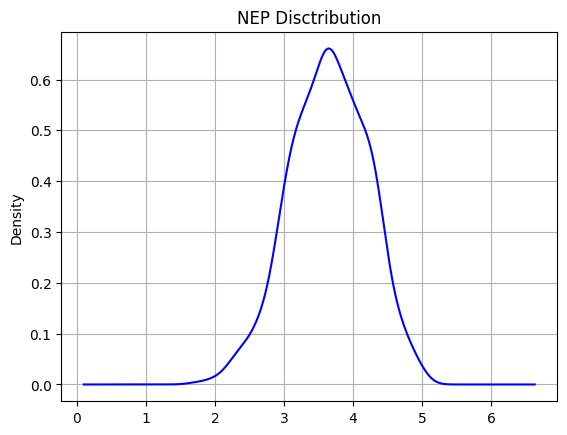

In [83]:
df_num.NEP.plot(kind='kde', color='blue', title='NEP Disctribution', grid=True)
plt.show()

**Interpretation**

- Minimum NEP of person going to vacation is 1.73
- Maximum NEP of person going to vacation is 5.0
- Average NEP of person going to vacation is 3.65
- Data is in Normal Distribution


In [84]:
# Show the numerical Columns

df_num.columns

Index(['Age', 'Education', 'Obligation_Rating', 'NEP', 'Vacation_Behaviour'], dtype='object')

#### Vacation Behaviour

In [89]:
# Show min, max and average of Vacation Behaviour attribute

print(f"Min: {to_fixed(df_num.Vacation_Behaviour.min(),2)} \nMax: {to_fixed(df_num.Vacation_Behaviour.max(),2)} \nAverage: {to_fixed(df_num.Vacation_Behaviour.mean(),2)}")

Min: 1.39 
Max: 4.77 
Average: 2.96


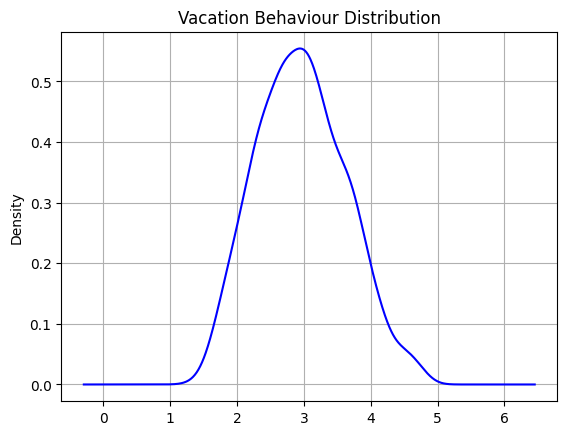

In [91]:
df_num.Vacation_Behaviour.plot(kind='kde',color='b',title='Vacation Behaviour Distribution',grid=True)
plt.show()

**Interpretation**

- Minimum Vacation behaviour of person going to Vacation is 1.39
- Maximum Vacation behaviour of person going to Vacation is 4.77
- Average Vacation behaviour of person going to Vacation is 2.96
- This data follow normal distribution

### Univarriate Analysis on Categorical Data

In [93]:
# Show first 5 observationsthe numerical Columns
df_cat.head()

,Gender,Occupation,State,Relationship_Status,Obligation_Category,Rest_and_relax,Luxury_be spoilt,Do_sports,excitement_a_challenge,Not_exceed_planned_budget,...,Entertainment_facilities,Not_care_about_prices,Life_style_of_the_local_people,Intense_Experience_of_Nature,Cosiness_or_Familiar_Atmosphere,Maintain_Unspoilt_Surroundings,Everything_Organised,Unspoilt_Nature_or_Natural_Landscape,Cultural_Offers,Change_of_Surroundings
0,Female,Clerical or service worker,VIC,single,Q4,yes,no,no,no,no,...,no,no,no,no,no,no,no,no,no,no
1,Female,professional,WA,married,Q1,yes,yes,no,no,no,...,no,no,yes,no,no,no,no,no,no,yes
3,Female,unemployed,NSW,single,Q1,yes,yes,no,no,yes,...,yes,no,no,yes,no,no,no,no,no,yes
4,Male,retired,WA,married,Q2,yes,no,no,no,yes,...,no,no,yes,no,no,yes,no,no,no,no
5,Female,retired,QLD,married,Q4,yes,no,no,no,yes,...,no,no,no,no,yes,no,no,no,no,no


In [94]:
# Show the columns

df_cat.columns

Index(['Gender', 'Occupation', 'State', 'Relationship_Status',
       'Obligation_Category', 'Rest_and_relax', 'Luxury_be spoilt',
       'Do_sports', 'excitement_a_challenge', 'Not_exceed_planned_budget',
       'Realise_creativity', 'Fun_and_entertainment', 'Good_company',
       'Health_and_beauty', 'Free_and_easy_going', 'Entertainment_facilities',
       'Not_care_about_prices', 'Life_style_of_the_local_people',
       'Intense_Experience_of_Nature', 'Cosiness_or_Familiar_Atmosphere',
       'Maintain_Unspoilt_Surroundings', 'Everything_Organised',
       'Unspoilt_Nature_or_Natural_Landscape', 'Cultural_Offers',
       'Change_of_Surroundings'],
      dtype='object')

#### Gender

In [96]:
# find the count

df_cat.Gender.value_counts()

Gender
Male      482
Female    430
Name: count, dtype: int64

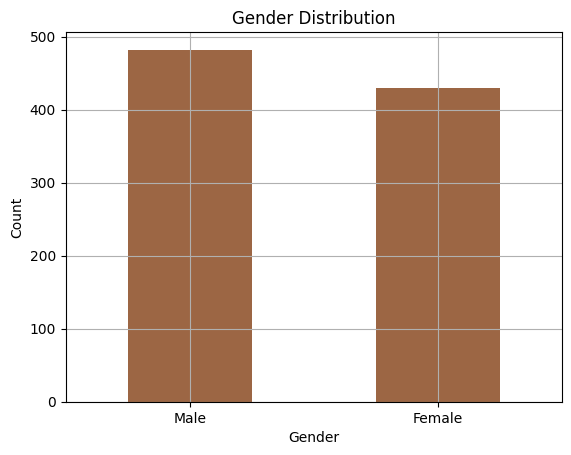

In [116]:
# Show the plot

df_cat.Gender.value_counts().plot(kind='bar', color='#9c6644', title='Gender Distribution', grid=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

**Interpretation**

- We have 482 male and 430 female persons going on vacation
- The Data is quite Balanced

In [118]:
# Show the columns

df_cat.columns


Index(['Gender', 'Occupation', 'State', 'Relationship_Status',
       'Obligation_Category', 'Rest_and_relax', 'Luxury_be spoilt',
       'Do_sports', 'excitement_a_challenge', 'Not_exceed_planned_budget',
       'Realise_creativity', 'Fun_and_entertainment', 'Good_company',
       'Health_and_beauty', 'Free_and_easy_going', 'Entertainment_facilities',
       'Not_care_about_prices', 'Life_style_of_the_local_people',
       'Intense_Experience_of_Nature', 'Cosiness_or_Familiar_Atmosphere',
       'Maintain_Unspoilt_Surroundings', 'Everything_Organised',
       'Unspoilt_Nature_or_Natural_Landscape', 'Cultural_Offers',
       'Change_of_Surroundings'],
      dtype='object')

#### Occupation

In [121]:
# find the count

df_cat.Occupation.value_counts()

Occupation
professional                  253
manager or administrator      180
Clerical or service worker     99
retired                        87
home-duties                    75
sales                          61
small business owner           56
unemployed                     35
tradesperson                   27
transport worker               20
labourer                       19
Name: count, dtype: int64

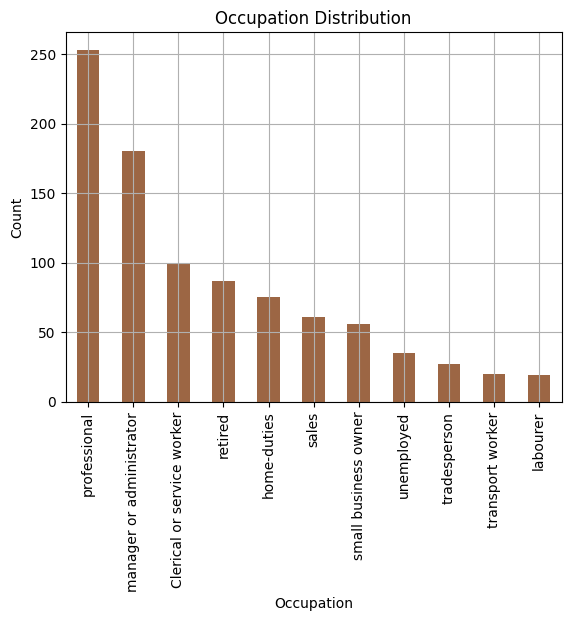

In [127]:
df_cat.Occupation.value_counts().plot(kind='bar',color='#9c6644',title='Occupation Distribution',grid=True)
plt.ylabel('Count')
plt.show()


**Interpretation**

- We have 253 professionals on Vacation
- We have 180 manager or administrator on Vacation
- We have 99 Clerical or service worker on Vacation
- We have 87 retired on Vacation
- We have 75 home-duties on Vacation
- We have 61 sales on Vacation
- We have 56 small business owner on Vacation
- We have 35 unemployed on Vacation
- We have 27 tradesperson on Vacation
- We have 20 transport worker on Vacation
- We have 19 labourer on Vacation